# SIT70 
# Task 7.1P
# Machine Learning

In [1]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv("Data_for_UCI_named.csv")

# Print the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)


Dimensions of the dataset: (10000, 14)


In [2]:
from sklearn.decomposition import PCA

# Separate features (X) and target (y)
X = df.drop(columns=["stabf"])
y = df["stabf"]

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Print dimensions of the modified dataset
print("Dimensions of modified dataset after PCA:", X_pca.shape)


Dimensions of modified dataset after PCA: (10000, 3)


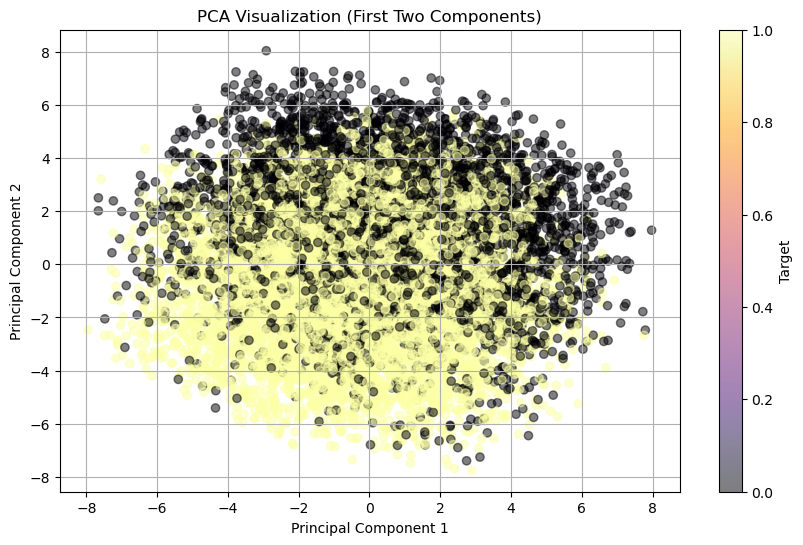

In [6]:
# Map target labels to numerical values
label_mapping = {'stable': 0, 'unstable': 1}
y_numeric = y.map(label_mapping)

# Plot the selected components using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='inferno', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (First Two Components)')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Separate features (X) and target variable (y)
X = df.drop(columns=["stabf"])
y = df["stabf"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict the target labels for the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9455
Classification Report:
              precision    recall  f1-score   support

      stable       0.92      0.92      0.92       693
    unstable       0.96      0.96      0.96      1307

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



Dimensions of the dataset: (10000, 14)


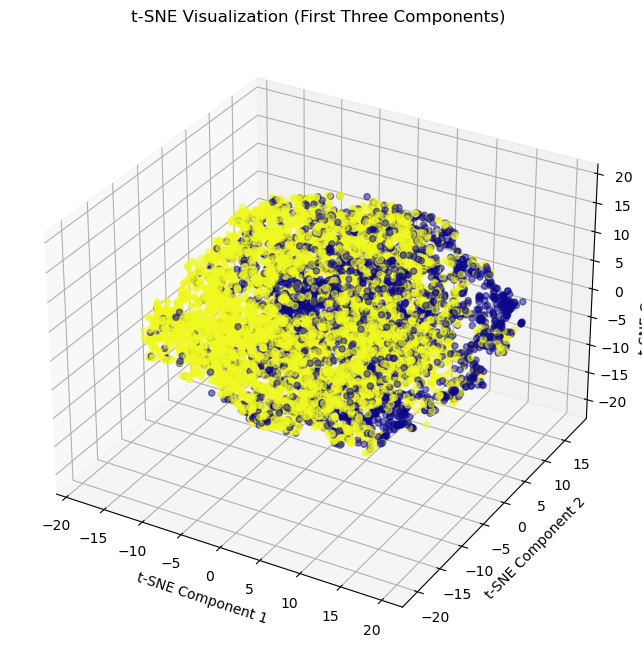

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Data_for_UCI_named.csv")

# Print the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

# Separate features (X) and target variable (y)
X = df.drop(columns=["stabf"])
y = df["stabf"]

# Apply label encoding to convert categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply t-SNE to reduce dimensionality to three components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the selected components using an appropriate visualization technique
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y_encoded, cmap='plasma', alpha=0.5)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Visualization (First Three Components)')
plt.show()


In [17]:

# Separate features (X) and target variable (y)
X = df.drop(columns=["stabf"])
y = df["stabf"]

# Split the data into training and testing sets using stratified sampling (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize SVM classifier with RBF kernel and select appropriate hyperparameters
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict the target labels for the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print performance metrics and model hyperparameters
print("Performance Metrics:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)
print("\nModel Hyperparameters:")
print("Kernel:", svm_classifier.kernel)
print("C:", svm_classifier.C)
print("Gamma:", svm_classifier.gamma)


Performance Metrics:
Accuracy: 0.8985

Classification Report:
              precision    recall  f1-score   support

      stable       0.89      0.82      0.85       724
    unstable       0.90      0.94      0.92      1276

    accuracy                           0.90      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.90      0.90      0.90      2000


Model Hyperparameters:
Kernel: rbf
C: 1.0
Gamma: scale


In both Task-2 and Task-4, we used Support Vector Machine (SVM) classifiers, one with a linear kernel and the other with an RBF kernel. SVMs are powerful supervised learning models known for their effectiveness in classification tasks. However, the performance of an SVM model depends heavily on the choice of hyperparameters.

Here's a brief overview of the hyperparameters used in SVM and their significance:

Kernel Type: SVM can use different kernel functions to transform the input space into a higher-dimensional space where the data might be more separable. Common kernel functions include linear, polynomial, and radial basis function (RBF). The choice of kernel can significantly impact the model's performance.
C (Regularization Parameter): The regularization parameter C controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C leads to a wider margin but may result in misclassification of some training examples. A larger value of C allows the model to classify more training examples correctly but may lead to overfitting.
Gamma (Kernel Coefficient for RBF Kernel): Gamma defines the influence of a single training example, with low values meaning far influence and high values meaning close influence. A small gamma value implies a large similarity radius, leading to a smoother decision boundary, while a large gamma value results in a more complex decision boundary, potentially leading to overfitting.
Hyperparameter tuning involves finding the optimal values for these parameters to improve the model's performance. This process typically involves:

Grid Search: Trying all possible combinations of hyperparameters from a grid and selecting the combination that yields the best performance.
Random Search: Randomly sampling hyperparameters from predefined distributions and evaluating their performance.
Cross-Validation: Splitting the data into multiple subsets (folds), training the model on different combinations of training and validation sets, and selecting the hyperparameters that result in the best average performance across all folds.
Model-Specific Techniques: Some models have specific algorithms for hyperparameter tuning, such as Bayesian optimization for Gaussian processes or evolutionary algorithms.